# A toy example of building, training and testing of GCN model on Club Dataset

## Zachary's karate club dataset

Zachary's karate club represents the relationships within a karate club studied by Wayne W. Zachary in the 1970s. It is a kind of social network, where every node is a member, and members who interacted outside the club are connected to each other.

In this example, the club is divided into four groups: we would like to **assign the right group to every member (node classification)** just by looking at their connections.

In [31]:
# import the dataset from PyG

from torch_geometric.datasets import KarateClub

# load the dataset
dataset = KarateClub()

# print the dataset
print(dataset)
print(len(dataset))
print(dataset.num_features)
print(dataset.num_classes)

KarateClub()
1
34
4


Based on above code block, we can find that this dataset only has 1 graph, where each node has a feature vector of 34 dimensions and is part of one out of four classes.

In [32]:
data = dataset[0]
print(data)

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])


The `Data` object offers a summary of graph information:
- `x=[34, 34]` node feature matrix shape **(number of nodes, number of features)**
- `edge_index=[2, 156]` represents the graph connectivity with shape **(2, number of edges)**
  - First list contains the sources of each edge
  - Second list contains the destinations of each edge
- `y=[34]` is the node labels, every node is assigned to one class, one value for each node
- `train_mask=[34]` tells which nodes should be used for training, a list of `Bool` value

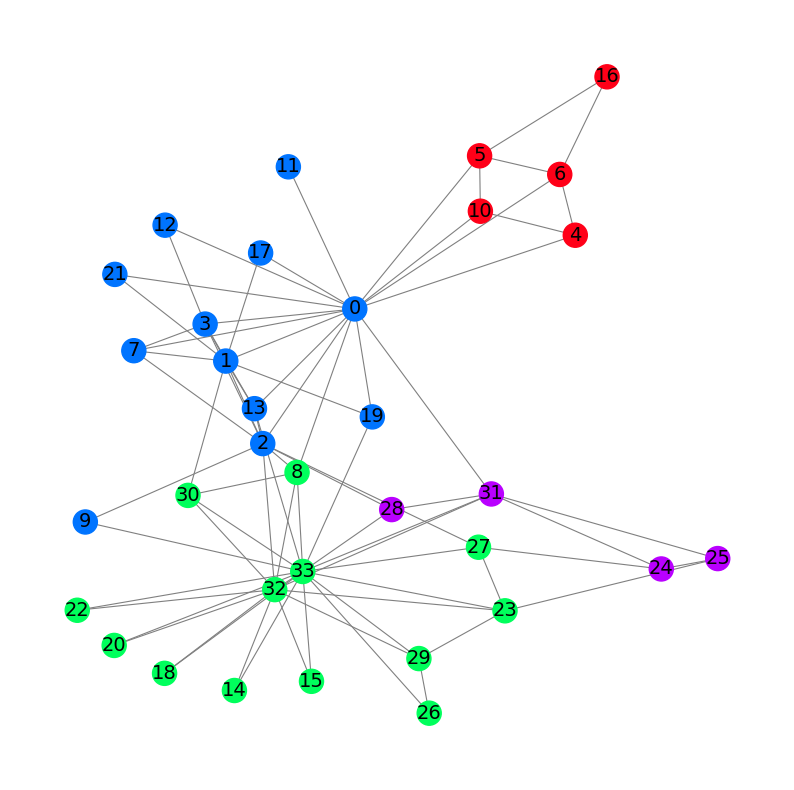

In [33]:
from torch_geometric.utils import to_networkx
import networkx as nx
import matplotlib.pyplot as plt

G = to_networkx(data, to_undirected=True)
plt.figure(figsize=(10, 10))
plt.axis('off')
nx.draw_networkx(G,
                 pos=nx.spring_layout(G, seed=42),
                 with_labels=True,
                 node_color=data.y,
                 cmap="hsv",
                 vmin=-2,
                 vmax=3,
                 width=0.8,
                 edge_color="grey",
                 font_size=14
)
plt.show()

In [34]:
# implement the GCN model
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv
import torch.nn.functional as F

class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        self.gcn = GCNConv(dataset.num_features, 16)
        self.out = Linear(16, dataset.num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.gcn(x, edge_index)
        x = x.relu()
        x = F.dropout(x, training=self.training)
        x = self.out(x)

        return x
    
model = GCN()
print(model)

GCN(
  (gcn): GCNConv(34, 16)
  (out): Linear(in_features=16, out_features=4, bias=True)
)


In [35]:
# define the optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

# Calculate accuracy
def accuracy(output, labels):
    return (output == labels).sum() / len(labels)

# train the model
for epoch in range(206):
    # clear gradients
    optimizer.zero_grad()

    # forward pass
    output = model(data)

    # calculate loss
    loss = criterion(output, data.y)

    # calculate accuracy
    acc = accuracy(output.argmax(dim=1), data.y)

    # compute gradients
    loss.backward()

    # tune parameters
    optimizer.step()

    # print the loss and accuracy
    print(f"Epoch: {epoch}, Loss: {loss:.4f}, Accuracy: {acc:.4f}")

Epoch: 0, Loss: 1.4267, Accuracy: 0.1471
Epoch: 1, Loss: 1.3977, Accuracy: 0.1471
Epoch: 2, Loss: 1.3987, Accuracy: 0.2647
Epoch: 3, Loss: 1.3728, Accuracy: 0.2941
Epoch: 4, Loss: 1.3567, Accuracy: 0.4118
Epoch: 5, Loss: 1.3492, Accuracy: 0.3235
Epoch: 6, Loss: 1.3390, Accuracy: 0.3824
Epoch: 7, Loss: 1.3114, Accuracy: 0.3529
Epoch: 8, Loss: 1.3042, Accuracy: 0.3824
Epoch: 9, Loss: 1.2628, Accuracy: 0.5588
Epoch: 10, Loss: 1.2463, Accuracy: 0.4706
Epoch: 11, Loss: 1.2483, Accuracy: 0.5000
Epoch: 12, Loss: 1.2082, Accuracy: 0.5294
Epoch: 13, Loss: 1.1570, Accuracy: 0.6176
Epoch: 14, Loss: 1.1701, Accuracy: 0.5588
Epoch: 15, Loss: 1.1382, Accuracy: 0.6176
Epoch: 16, Loss: 1.1200, Accuracy: 0.5588
Epoch: 17, Loss: 1.0994, Accuracy: 0.6176
Epoch: 18, Loss: 1.0695, Accuracy: 0.6471
Epoch: 19, Loss: 1.0649, Accuracy: 0.6471
Epoch: 20, Loss: 1.0518, Accuracy: 0.5882
Epoch: 21, Loss: 0.9899, Accuracy: 0.7941
Epoch: 22, Loss: 1.0200, Accuracy: 0.6471
Epoch: 23, Loss: 0.9610, Accuracy: 0.7647
Ep